# <u>Homework 7</u>

<br>Semih KARACAOĞLU</br>
<br>17050111008</br>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv("test.csv")

In [3]:
list(df.keys())

['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [5]:
df.shape

(7713, 16)

In [6]:
df.head()

Artist Name                                Track Name  Popularity  \
0      David Bowie              Space Oddity - 2015 Remaster        73.0   
1      Crimson Sun                       Essence of Creation        34.0   
2             P!nk                          Raise Your Glass        78.0   
3     Shawn Mendes                                    Wonder        80.0   
4  Backstreet Boys  Helpless When She Smiles - Radio Version        48.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.310   0.403   NaN   -13.664     1       0.0326       0.07260   
1         0.511   0.955   1.0    -5.059     1       0.1290       0.00040   
2         0.700   0.709   7.0    -5.006     1       0.0839       0.00480   
3         0.333   0.637   1.0    -4.904     0       0.0581       0.13100   
4         0.393   0.849  11.0    -4.114     1       0.0459       0.00421   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.000093    0.1390    0.466  134.480       318027.000000   
1          0.000009    0.2630    0.291  151.937       220413.000000   
2               NaN    0.0289    0.625  122.019       202960.000000   
3          0.000018    0.1490    0.132  139.898       172693.000000   
4               NaN    0.1620    0.222   74.028            4.093117   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [7]:
df['time_signature'].unique()

array([4, 3, 1, 5, 0], dtype=int64)

In [8]:
#Checking if there are NaN values in the dataset.

df.isnull().values.any()

True

In [9]:
#Replacing all the NaN values with 0's.

df = df.fillna(0)

In [10]:
#Now we make sure if there are NaN values.

df.isnull().values.any()

False

<b>Exploratory Data Analysis(EDA)</b> helps us visualise the data and infer some conclusions initially just by looking at the data and not performing any algorithms. With below code block we can easily analyse the dataset if there are some <b>correlation</b> between features.

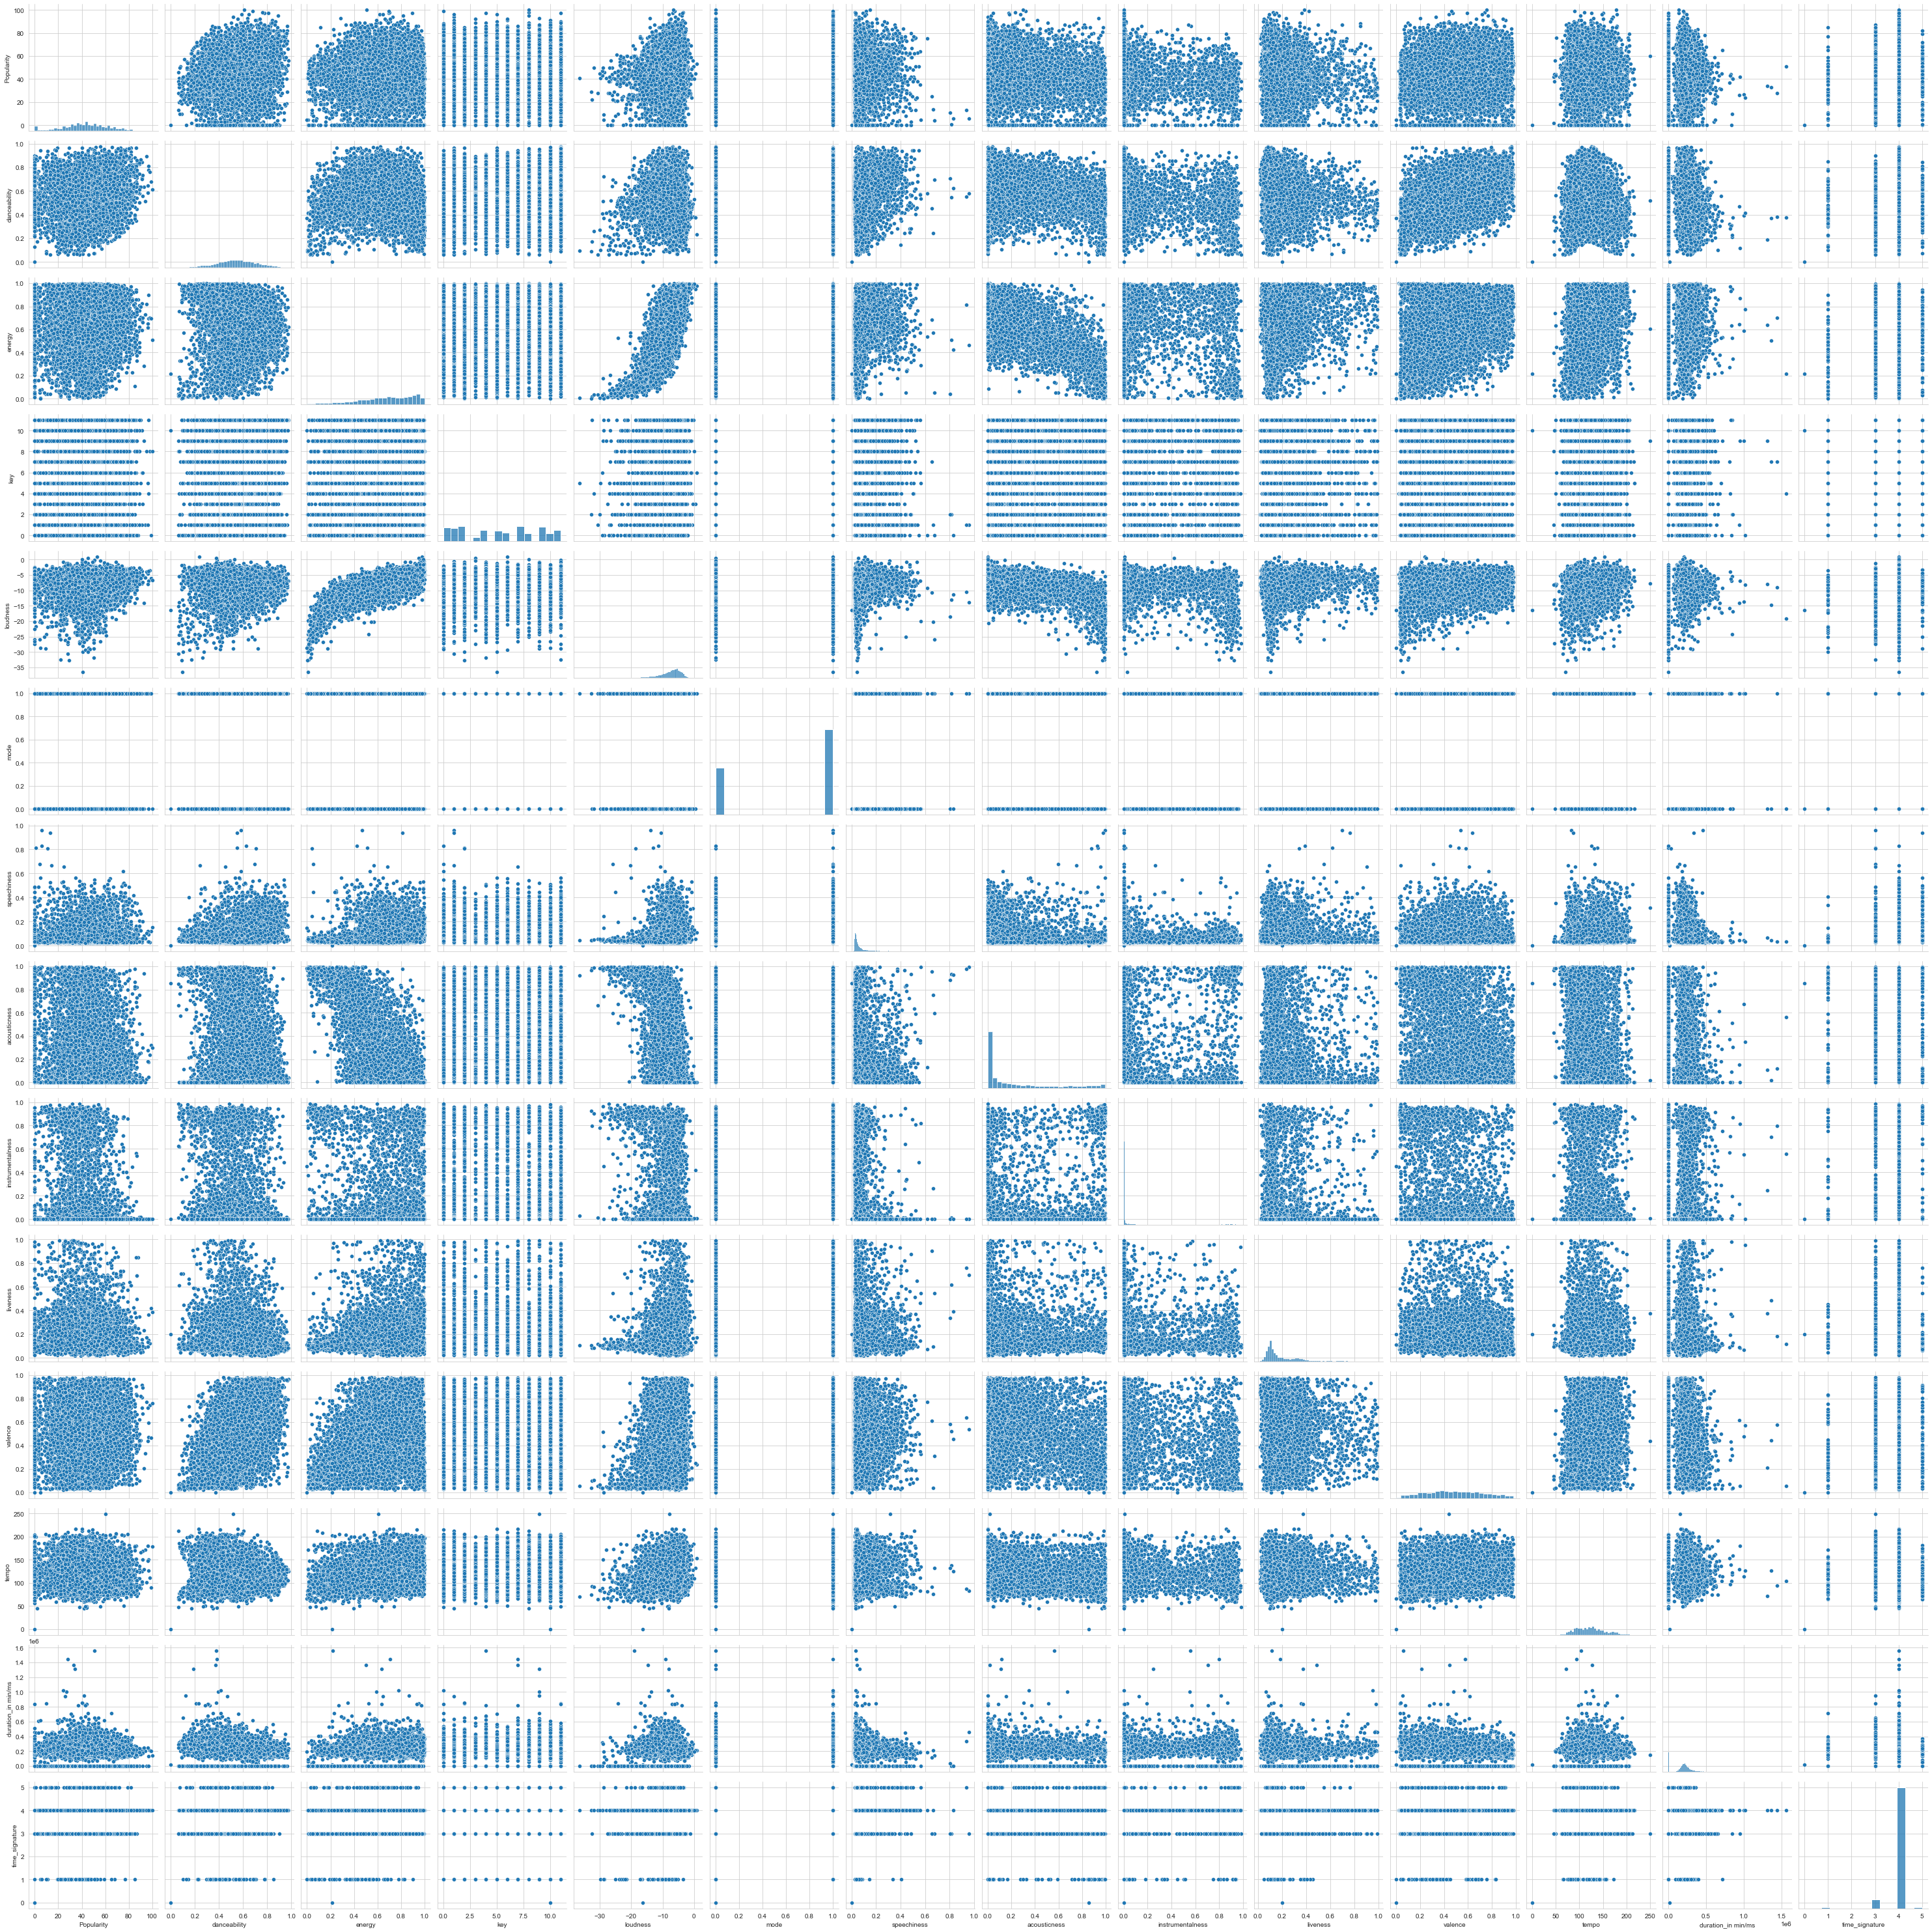

In [11]:
#Exploratory Data Analysis(EDA)

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, height=3);
plt.show()

As we can see there is not much correlation between features. Although there is a bit correlation between <b>loudness</b> and <b>energy</b> feature, it will not affect so much the classification result.  

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(df, size=5) \
.map(plt.scatter, "loudness", "energy") \
.add_legend();
plt.show()

In [16]:
df2 = pd.read_csv("submission.csv")

In [17]:
list(df2.keys())

['Acoustic/Folk_0',
 'Alt_Music_1',
 'Blues_2',
 'Bollywood_3',
 'Country_4',
 'HipHop_5',
 'Indie Alt_6',
 'Instrumental_7',
 'Metal_8',
 'Pop_9',
 'Rock_10']

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Acoustic/Folk_0  7713 non-null   int64
 1   Alt_Music_1      7713 non-null   int64
 2   Blues_2          7713 non-null   int64
 3   Bollywood_3      7713 non-null   int64
 4   Country_4        7713 non-null   int64
 5   HipHop_5         7713 non-null   int64
 6   Indie Alt_6      7713 non-null   int64
 7   Instrumental_7   7713 non-null   int64
 8   Metal_8          7713 non-null   int64
 9   Pop_9            7713 non-null   int64
 10  Rock_10          7713 non-null   int64
dtypes: int64(11)
memory usage: 663.0 KB


In [29]:
df2

Acoustic/Folk_0  Alt_Music_1  Blues_2  Bollywood_3  Country_4  HipHop_5  \
0                   1            0        0            0          0         0   
1                   0            1        0            0          0         0   
2                   0            0        1            0          0         0   
3                   0            0        0            1          0         0   
4                   0            0        0            0          1         0   
...               ...          ...      ...          ...        ...       ...   
7708                0            0        0            0          0         0   
7709                0            0        0            0          0         0   
7710                0            0        0            0          0         0   
7711                0            0        0            0          0         0   
7712                0            0        0            0          0         0   

      Indie Alt_6  Instrumental_7  Metal_8  Pop_9  Rock_10  
0               0               0        0      0        0  
1               0               0        0      0        0  
2               0               0        0      0        0  
3               0               0        0      0        0  
4               0               0        0      0        0  
...           ...             ...      ...    ...      ...  
7708            0               0        0      0        0  
7709            0               0        0      0        0  
7710            0               0        0      0        0  
7711            0               0        0      0        0  
7712            0               0        0      0        0  

[7713 rows x 11 columns]

In [30]:
df2.iloc[5,:]

Acoustic/Folk_0    0
Alt_Music_1        0
Blues_2            0
Bollywood_3        0
Country_4          0
HipHop_5           1
Indie Alt_6        0
Instrumental_7     0
Metal_8            0
Pop_9              0
Rock_10            0
Name: 5, dtype: int64

In [32]:
df3 = pd.read_csv("train.csv")

In [33]:
list(df3.keys())

['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'Class']

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [35]:
df3.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [36]:
df3['Class'].unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0], dtype=int64)